<header style="text-align: center;">
    <h1 style="font-variant: small-caps; padding-bottom: .5em;">
        Solução Analítica - Cálculo Funcional
    </h1>
</header>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Equação do Pêndulo

A equação diferencial em questão tem como objetivo encontrar a posição - o ângulo $p$ - de um pêndulo num tempo $t$. Considera-se tudo tão ideal quanto é possível ou necessário para facilitar a modelagem: a haste, a massa e, ao menos inicialmente, a falta de amortecimento (como a resistência do ar, por exemplo).

Considerando o parágrafo acima e o que será feito a seguir, a equação do pêndulo é dada pelo seguinte Problema de Valor Inicial: <!-- Há outra possibilidade que é definir o ângulo em dois instantes diferentes, mas isso não ajuda no que vem depois então essa informação foi omitida -->

$\begin{cases}
\displaystyle \frac{d^2p}{dt^2} = -\frac{g}{L} \sin(p) \\
p(t_0) = p_0 \\
\displaystyle \frac{dp}{dt}(t_0) = v_0
\end{cases}$

Onde $p_0$ e $v_0$ são constantes, $g$ é a aceleração da gravidade e $L$ é o comprimento da haste.

## 2. Aproximação Linear

Se o ângulo for pequeno o suficiente pode-se dizer que $\sin(p) \approx p$, uma forma de mostrar que isso é válido é convencer-se de que $\displaystyle \lim_{p \to 0} \frac{\sin(p)}{p} = 1$ sem usar a Regra de l'Hospital.

Nesse caso, pode-se modificar nosso PVI para que tenhamos uma equação diferencial linear:

$\begin{cases}
\displaystyle \frac{d^2p}{dt^2} = -\frac{g}{L} p \\
p(t_0) = p_0 \\
\displaystyle \frac{dp}{dt}(t_0) = v_0
\end{cases}$

Isso torna o sistema mais fácil de resolver, mas introduz um erro, mesmo assim pode facilitar a compreensão de muitas coisas.

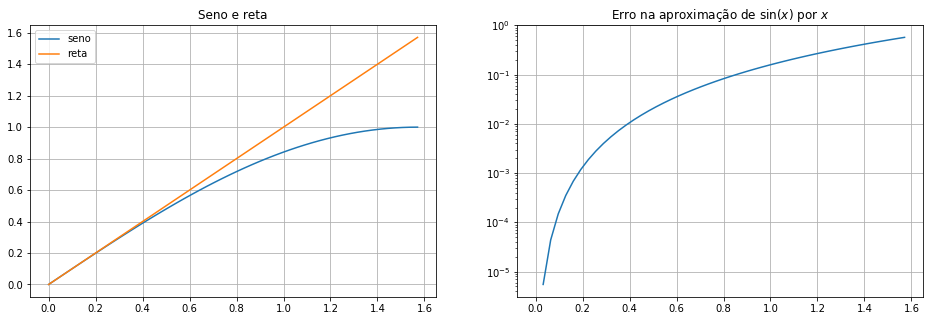

In [2]:
xs = np.linspace(0,np.pi/2,50)
plt.figure(figsize=(16,5))

plt.subplot('121')
plt.title('Seno e reta')
plt.plot(xs,np.sin(xs),label='seno')
plt.plot(xs,xs,label='reta')
plt.legend()
plt.grid()

err = np.abs(xs-np.sin(xs))
plt.subplot('122')
plt.title('Erro na aproximação de $\sin(x)$ por $x$')
plt.semilogy(xs,err)
plt.grid()

plt.show()

Olhando os gráficos acima pode-se ter uma ideia de onde a senóide para de parecer uma reta.

Antes de começar a procurar um bom ângulo máximo (em módulo, o ângulo pode ser negativo já que é igual a zero na posição de repouso, solto) para o nosso pêndulo pendular seria bom definir uma tolerância para a diferença entre a reta e senóide para estabelecer esse ângulo.

Por exemplo, pode-se escolher a tolerância $tol = 10^{-3}$. Abaixo uso uma implementação inocente do método de Newton para encontrar o $\theta$ correspondente, para isso é necessário tomar algumas decisões:

1. Como dito antes, a tolerância `tol =` $10^{-3}$;
2. Como estou procurando a diferença entre a senóide e a reta num intervalo em que ambas tem imagens positivas, a função cuja raíz Newton vai procurar é: $f(x) = x - \sin(x) -$ `tol`; e sua derivada: $f'(x) = 1 - \cos(x)$;
3. Minha $f'(x)$ não permite a escolha de $0$ como chute inicial, pois $f'(0) = 0$, mas olhando o gráfico da direita parece uma boa ideia escolher $x_0 = 0.2$.

<!-- Se a imagem das duas funções pudesse ser negativa em alguma parte do domínio, provavelmente faria sentido escolher uma função como f(x) = (x - sin(x))**2 - tol**2 -->

<!-- Zero é um bom chute preguiçoso, se não houvesse obstáculos poderia ser usado -->

In [3]:
tol = 1e-3

def f(x):
    global tol
    return x-np.sin(x)-tol

def df(x):
    return 1-np.cos(x)

def newton_naive(f,df,x0,tol=1e-3,max_iter=20):
    x1 = x0 - f(x0)/df(x0)
    err = abs(x1-x0)
    while err > tol and max_iter > 0:
        x0 = x1
        x1 = x0 - f(x0)/df(x0)
        err = abs(x1-x0)
        max_iter -= 1
    return x1

start_angle = newton_naive(f,df,0.2)
start_angle

0.18181220210856522

## 3. Sistemas de Equações Diferencias de Primeira Ordem

Quando temos uma equação diferencial de segunda ordem ou superior, pode-se transforma-la em um sistema de equações diferenciais de primeira ordem. Isso permite usar um ferramental da Álgebra Linear para o qual não havia espaço antes. <!--embora houvesse para outros -->

$\begin{pmatrix} \displaystyle \frac{d^2p}{dt^2} = -\frac{g}{L} p \end{pmatrix} \equiv$
$\begin{cases}
\displaystyle \frac{dp}{dt} = v \\
\displaystyle \frac{dv}{dt} = -\frac{g}{L} p \\
\end{cases}$

Vale observar que não era necessário linearizar para transformar a equação de segunda ordem num sistema de equações de primeira ordem.

## 4. Solução analítica

Como o objetivo é mostrar a solução usando Cálculo Funcional, a solução analítica ficou a cargo do [Wolfram Alpha](http://www.wolframalpha.com/):

$p(t) = p_0 \cos \begin{pmatrix} \displaystyle t \sqrt{\frac{g}{L}} \end{pmatrix} + \displaystyle \frac{v_0 \sin \begin{pmatrix} \displaystyle t \sqrt{\frac{g}{L}} \end{pmatrix}}{\sqrt{\displaystyle \frac{g}{L}}}$

$v(t) = v_0 \cos \begin{pmatrix} \displaystyle t \sqrt{\frac{g}{L}} \end{pmatrix} - \displaystyle p_0 \sqrt{\frac{g}{L}} \sin \begin{pmatrix} \displaystyle t \sqrt{\frac{g}{L}} \end{pmatrix}$

<!-- Se forem conferir, sugiro trocar g/L por k1, p0 por k2 e v0 por k3. Isso vai evitar que o Wolfram interprete errado a sua entrada, mas adiciona um esforço de "tradução" da resposta dada -->

In [4]:
g,L = 10,1
p0,v0 = start_angle,0

# Expressões analíticas para p e v dadas pelo wolfram alpha
p = lambda p0,v0,ts: p0*np.cos(np.sqrt(g/L)*ts) + v0*np.sin(np.sqrt(g/L)*ts)/np.sqrt(g/L)
v = lambda p0,v0,ts: v0*np.cos(np.sqrt(g/L)*ts) - np.sqrt(g/L)*p0*np.sin(np.sqrt(g/L)*ts)

ts = np.linspace(0,np.pi,100)
ps = p(p0,v0,ts)
vs = v(p0,v0,ts)

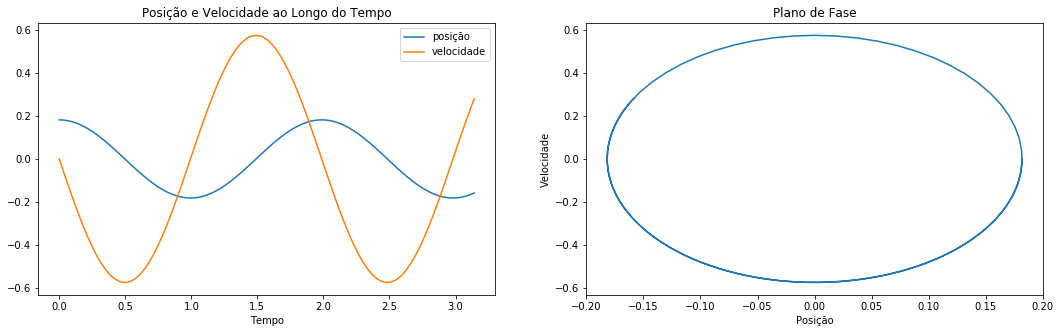

In [5]:
plt.figure(figsize=(18,5))

plt.subplot('121')
plt.title('Posição e Velocidade ao Longo do Tempo')
plt.xlabel('Tempo')
plt.plot(ts,ps,label='posição')
plt.plot(ts,vs,label='velocidade')
plt.legend()

plt.subplot('122')
plt.title('Plano de Fase')
plt.xlabel('Posição')
plt.ylabel('Velocidade')
plt.plot(ps,vs)

plt.show()

## 5. Forma Matricial

É possível escrever o sistema de equações de diferenciais lineares na forma matricial assim como com um sistema linear:

$\begin{cases}
    \displaystyle \frac{dp}{dt} = v(t) \\
    \displaystyle \frac{dv}{dt} = -\frac{g}{L} p
\end{cases}$

$y(t) = \begin{bmatrix} p(t) \\ v(t) \end{bmatrix}, \qquad
y(t_0) = y_0 = \begin{bmatrix} p_0 \\ v_0 \end{bmatrix}, \qquad
\displaystyle \frac{dy}{dt} = \begin{bmatrix} v(t) \\ \displaystyle -\frac{g}{L} p(t) \end{bmatrix}$

Quero uma matriz $A$ tal que $\displaystyle \frac{dy}{dt} = A y(t)$:

$A = \begin{bmatrix} 
    \begin{align}
        \displaystyle 0& \quad 1 \\
        -\frac{g}{L}& \quad 0 
    \end{align}
\end{bmatrix}$

Resolvendo o PVI normalmente, encontro a solução:

$y(t) = e^{tA} y_0$

In [6]:
import scipy.linalg as linalg

In [7]:
def M (g,L):
    return np.array([[0,1],[-g/L,0]])

In [8]:
y0 = np.array([p0,v0])
A = M(g,L)
y = lambda t: linalg.expm(t*A) @ y0
ys = np.array([y(t) for t in ts])

M_ps,M_vs = zip(*ys)

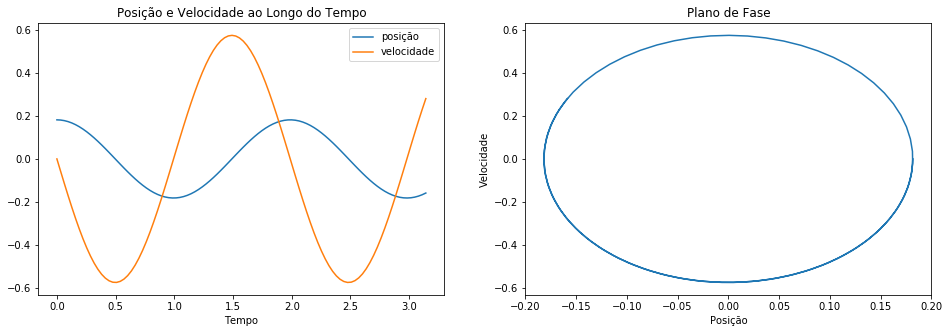

In [9]:
plt.figure(figsize=(16,5))

plt.subplot('121')
plt.title('Posição e Velocidade ao Longo do Tempo')
plt.xlabel('Tempo')
plt.plot(ts,M_ps,label='posição')
plt.plot(ts,M_vs,label='velocidade')
plt.legend()

plt.subplot('122')
plt.title('Plano de Fase')
plt.xlabel('Posição')
plt.ylabel('Velocidade')
plt.plot(M_ps,M_vs)

plt.show()

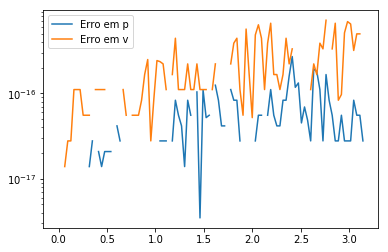

In [10]:
err_p, err_v = np.abs(M_ps-ps), np.abs(M_vs-vs)
plt.semilogy(ts,err_p,label='Erro em p')
plt.semilogy(ts,err_v,label='Erro em v')
plt.legend()

plt.show()